 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Matice-(matrix)" data-toc-modified-id="Matice-(matrix)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Matice (matrix)</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Použití-matic" data-toc-modified-id="Použití-matic-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Použití matic</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Pole-(array)" data-toc-modified-id="Pole-(array)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pole (array)</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Použití-polí" data-toc-modified-id="Použití-polí-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Použití polí</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Seznam-(list)" data-toc-modified-id="Seznam-(list)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Seznam (list)</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Použití-seznamů" data-toc-modified-id="Použití-seznamů-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Použití seznamů</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Datová-tabulka-(data.frame)" data-toc-modified-id="Datová-tabulka-(data.frame)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Datová tabulka (data.frame)</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Použití-datových-tabulek" data-toc-modified-id="Použití-datových-tabulek-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Použití datových tabulek</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Faktor-(factor)" data-toc-modified-id="Faktor-(factor)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Faktor (factor)</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Použití-faktorů" data-toc-modified-id="Použití-faktorů-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Použití faktorů</a></span></li></ul></li></ul></div>

# Datové struktury v R

Tato lekce se zaměřuje na to, co pravděpodobně budete potřebovat na začátku každé datové analýzy, tj. znát jaké možnosti reprezantace vašeho datového souboru vám R nabízí a jakou nejlépe zvolit.

V [předchozí lekci](../03/) jsme si již představili vektory, které představují asi nejpřímočařejší cestu k reprezentaci analyzovaných dat, neboť ve statistice nejsou jednolivá měření nebo vzorky nic víc než jen pouhá řada čísel. Někdy ale budete muset načíst i data strukturovaná trochu jinak (například vzorky měřené současně na několika přístrojích). V této lekci si tedy ukážeme další struktury, které na vektorech staví ale nabízí rozšířenou funkcionalitu pro pohodlnější práci s různými typy dat. 

## Matice (matrix)

S maticemi jste se určitě už setkali v matematice, takže víte, že to jsou vlastně vektory naskládané pod sebe. V R si můžete matice představit jako vektor, který má nevíc ještě dva atributy, kterými jsou počet řádek a počet sloupců. Že je tomu skutečně tak ukazuje následující kód, který pro přiřazení použíje funkci `dim`, která zajišťuje přístup k oběma atributům:

In [1]:
x <- 1:12
dim(x) <- c(4, 3) # převedení vektoru na matici

class(x)
x
attributes(x) # některé objekty v R mohou mít atributy, co přesně
dim(x)
nrow(x) # počet řádek
ncol(x) # počet sloupců

[1] "matrix"

1,5,9
2,6,10
3,7,11
4,8,12


$dim
[1] 4 3

[1] 4 3

[1] 4

[1] 3

Toto je sice netradiční způsob vytvoření matice, ale ukazuje nám, co vlastně matice pro R znamená. V tomto případě je třeba vždy zadat počet řádků i počet sloupců, protože vlastně nastavujeme přímo konkrétní atribut výsledného vektoru. Použití funkce `matrix` už takové omezení nemá:

In [2]:
m_x <- matrix(x, nrow = 4)
dim(m_x)
class(m_x)
m_x
attributes(m_x)

[1] 4 3

[1] "matrix"

1,5,9
2,6,10
3,7,11
4,8,12


$dim
[1] 4 3

Tento postup je tedy čitelnější a o něco jednodušší, neboť rozdělení na sloupce již R vyřeší za vás. Stejného výsledku byste docíli i takto:

In [3]:
m_x <- matrix(x, ncol = 3)
print(m_x)
m_x <- matrix(x, nrow = 4, ncol=3)
print(m_x)

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12
     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12


Je třeba si též uvědomit, že rozdíl mezi použitím postupu s funkcí `matrix` oproti funkci `dim` je i v tom, že pomocí funkce `dim` je modifikován stávající objekt, ale funkce matrix vrací objekt nový. Při použití funkce `dim` tedy nedochází ke kopírování, což znamená rychlejší vykonávání, avšak za ztráty struktury původního objektu.

Jak jste si asi všimli, při vytváření matice z vektoru se postupuje podle sloupců nikoliv řádků. Pokud to chcete naopak můžete nastavit parametr `byrow` na `TRUE`:

In [4]:
m_x <- matrix(x, ncol = 3, byrow = T)
m_x

1,2,3
4,5,6
7,8,9
10,11,12


Matice lze vytvářet i přímo z vektorů pomocí funkce `as.matrix`. Výsledkem je pak jednorozměrná matice:

In [5]:
as.matrix(1:10)

1
2
3
4
5
6
7
8
9
10


V jednom z příkladů nahoře též vidíte, že funkce `print` vám kromě samotné matice ukáže navíc i další informace. Ty se týkají souřadnic (indexů) jednotlivých prvků. Je to v podstatě i návod, jak k jednotlivým prvkům přistupovat:

In [6]:
m_x[1,1]
m_x[2,2]
m_x[3,3]
m_x[4,3]

[1] 1

[1] 5

[1] 9

[1] 12

Pokud jeden z indexů vynecháte, dostanete vektor reprezentující celý řádek nebo sloupec:

In [7]:
m_x[,1]
m_x[1,]
m_x[-1,] # i negativní indexy fungují, jak by člověk čekal

[1]  1  4  7 10

[1] 1 2 3

4,5,6
7,8,9
10,11,12


Jako indexy můžete samozřejmě používat i vektory:

In [8]:
print(
    m_x[c(3, 4), 2:3] # numerické
)
print(
    m_x[c(F, F, T, T), c(F, T, T)] # nebo logické
)

     [,1] [,2]
[1,]    8    9
[2,]   11   12
     [,1] [,2]
[1,]    8    9
[2,]   11   12


nebo dokonce matice samotné:

In [9]:
print(m_x)
maska <- matrix(
    c(
        T, T, T,
        F, F, F,
        T, T, T,
        F, F, F
    )
    , nrow = 4
    , byrow = T
)
print(maska)
m_x[maska]

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6
[3,]    7    8    9
[4,]   10   11   12
      [,1]  [,2]  [,3]
[1,]  TRUE  TRUE  TRUE
[2,] FALSE FALSE FALSE
[3,]  TRUE  TRUE  TRUE
[4,] FALSE FALSE FALSE


[1] 1 7 2 8 3 9

Všimněte si, že zde je výsledkem vektor čísel, která odpovídají vybraným hodnotám v naší masce a to opět podle sloupců.

Pokud z matice vybíráme pouze jednu dimenzi, R automaticky vrátí výsledek též jako vektor:

In [10]:
vyber <- m_x[1,]
vyber
class(vyber)
dim(vyber)

[1] 1 2 3

[1] "integer"

NULL

Pokud tomu chceme zamezit, můžeme funkci `[` specifikovat argument `drop`, který toto chování řídí (ano, `[` je funkce stejně jako všechny operace v R):

In [11]:
vyber <- m_x[1,, drop = F]
vyber
class(vyber)
dim(vyber)

1,2,3


[1] "matrix"

[1] 1 3

Do matic lze samozřejmě pomocí indexů i zapisovat:

In [12]:
print(m_x)
m_x[,1] <- c(1, 2, 3, 4) # nastav obsah prvniho sloupce na daný vektor
print(m_x)
m_x[,1] <- c(1, 2)
print(m_x) # i zde funguje recyklace hodnot vektoru

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6
[3,]    7    8    9
[4,]   10   11   12
     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    2    5    6
[3,]    3    8    9
[4,]    4   11   12
     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    2    5    6
[3,]    1    8    9
[4,]    2   11   12


In [13]:
m_x[c(3, 4), 2:3] <- matrix(numeric(4), nrow = 2)
print(m_x)
m_x[c(3, 4), 2:3] <- c("a", "b", "c", "d") # je možné rovnoou i zapsat vektor správné délky
print(m_x)

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    2    5    6
[3,]    1    0    0
[4,]    2    0    0
     [,1] [,2] [,3]
[1,] "1"  "2"  "3" 
[2,] "2"  "5"  "6" 
[3,] "1"  "a"  "c" 
[4,] "2"  "b"  "d" 


Všimněte si, že i matice mohou být pouze jednoho typu, stejně jako vektory. Po přiřazení vektoru dat jiného typu (zde `character`) se všechny prvky převedou na největší společný typ, tedy opět `character`.

Stejně jako s vektory je možné i s maticemi provádět různé operace. Například:

In [14]:
m_y <- matrix(1:4, nrow = 2, byrow = T)
m_y

print(
    m_y * 2
)
print(
    m_y > 2
)
print(
    m_y + m_y # sčítání
)
print(
    m_y * m_y # klasické násobení
)
print(
    m_y %*% m_y # maticové násobení
)
print(
    t(m_y) # transponovaná matice
)

1,2
3,4


     [,1] [,2]
[1,]    2    4
[2,]    6    8
      [,1]  [,2]
[1,] FALSE FALSE
[2,]  TRUE  TRUE
     [,1] [,2]
[1,]    2    4
[2,]    6    8
     [,1] [,2]
[1,]    1    4
[2,]    9   16
     [,1] [,2]
[1,]    7   10
[2,]   15   22
     [,1] [,2]
[1,]    1    3
[2,]    2    4


Stejně jako u vektorů lze jednotlivé řádky a sloupce v matici pojmenovávat:

In [15]:
colnames(m_y) <- c("první sloupec", "druhý sloupec")
rownames(m_y) <- c("první řádek", "druhý řádek")
attributes(m_y)
colnames(m_y)
rownames(m_y)
m_y

$dim
[1] 2 2

$dimnames
$dimnames[[1]]
[1] "první řádek" "druhý řádek"

$dimnames[[2]]
[1] "první sloupec" "druhý sloupec"

[1] "první sloupec" "druhý sloupec"

[1] "první řádek" "druhý řádek"

,první sloupec,druhý sloupec
první řádek,1,2
druhý řádek,3,4


### Použití matic

Matice je v podstatě tabulka, a proto se ve statistice nejčastěji používá k zakódování výsledků měření různých číselných proměnných (sloupce) pro řadu vzorků (řádky). Například následující matice kóduje nejrůznější data o třech lidech:

In [16]:
data <- matrix(
    c(
        0, 65, 20,
        1, 75, 19,
        0, 68, 21
    )
    , byrow = T
    , nrow = 3
)
colnames(data) <- c("pohlaví", "váha", "věk")
rownames(data) <- c(1:nrow(data))
data

,pohlaví,váha,věk
1,0,65,20
2,1,75,19
3,0,68,21


Asi vás napadlo, že matice má nevýhodu v tom, že všechny položky můsí být reprezentovány číselně, a tudíž je sloupec `pohlaví` nečitelný, neboť musíme vědět podle jakého klíče jsou hodnoty kódovány. Tento problém řeší datová struktura `data.frame`, která je rozšířením matic a představíme si ji za nedlouho.

Matice jsou též vhodné pro reprezentaci obrázků a podobných dat, neboť jednotlivé prvky mohou snadno reprezentovat barvu jednotlivých pixelů. Mezi testovacími daty, která jsou v R dostupná pod různými proměnnými, je například množina [volcano](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/volcano.html), která poskytuje topologická data o sopce Maunga Whau, která se nachází nedaleko od Aucklandu. Tuto matici si lze jako obrázek vykreslit například takto:

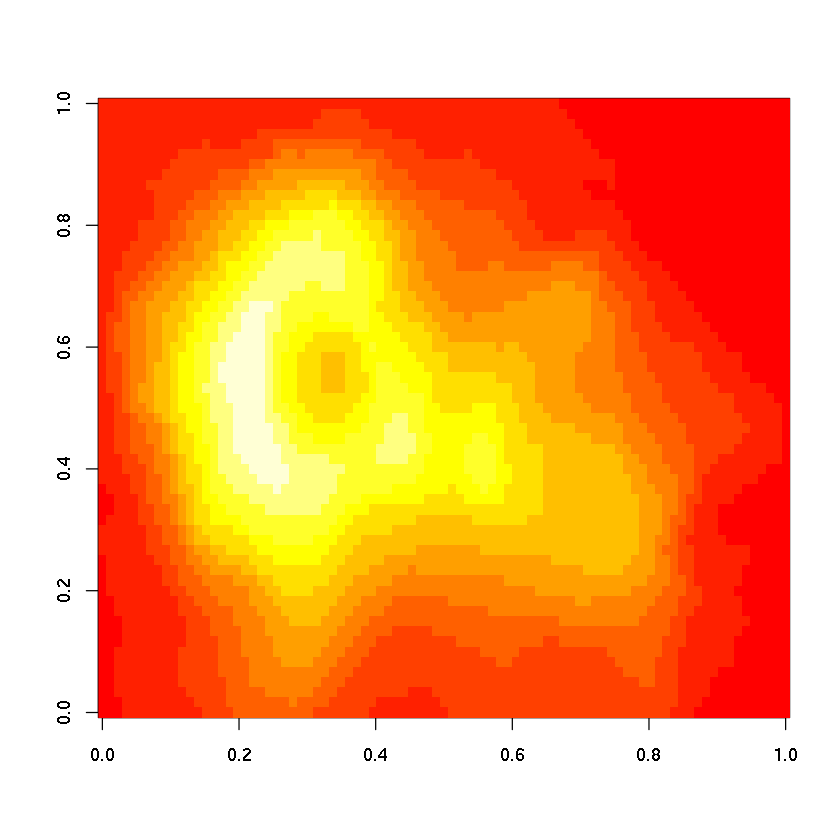

In [17]:
image(volcano)

## Pole (array)

Pole by se daly považovat za generalizaci matic, neboť je to vlastně $n$ vektorů, kde každý z nich tvoří jednu dimenzi. Při vytváření pole se tedy místo počtu řádků a sloupců uvádí rozměr každé dimenze (parametr `dim` funkce `array`):

In [18]:
ar_x <- array(1:24, dim = c(4,3,2))
print(ar_x)

, , 1

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12

, , 2

     [,1] [,2] [,3]
[1,]   13   17   21
[2,]   14   18   22
[3,]   15   19   23
[4,]   16   20   24



Vytvořili jsme tedy třírozměrné pole, které má celkem 24 buněk rozdělených do 4 řádek v první dimenzi, tří ve druhé a dvou ve třetí. Jelikož lze v textovém výpisu zobrazit najednou pouze dvě dimenze, je tento rozdělen na několik částí reprezentujících různé kombinace prvních dvou dimenzí s ostatními (zde pouze se třetí). Jedná se tak tedy v podstatě o dvourozměrné řezy v různých vrstvách podle dalších dimenzí. Pro čtyřrozměrné pole, které si jen těžko představíme, pak výstup vypadá například takto:

In [19]:
ar_y <- array(1:48, dim = c(4,3,2,2))
print(ar_y)

, , 1, 1

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12

, , 2, 1

     [,1] [,2] [,3]
[1,]   13   17   21
[2,]   14   18   22
[3,]   15   19   23
[4,]   16   20   24

, , 1, 2

     [,1] [,2] [,3]
[1,]   25   29   33
[2,]   26   30   34
[3,]   27   31   35
[4,]   28   32   36

, , 2, 2

     [,1] [,2] [,3]
[1,]   37   41   45
[2,]   38   42   46
[3,]   39   43   47
[4,]   40   44   48



To, že se nejedná o matici ale o vícerozměrné pole, lze snadno ověřit funkcemi, které už známe:

In [20]:
class(ar_x)
nrow(ar_x)
ncol(ar_x)
dim(ar_x)
attributes(ar_x)

class(ar_y)
nrow(ar_y)
ncol(ar_y)
dim(ar_y)
attributes(ar_y)

[1] "array"

[1] 4

[1] 3

[1] 4 3 2

$dim
[1] 4 3 2

[1] "array"

[1] 4

[1] 3

[1] 4 3 2 2

$dim
[1] 4 3 2 2

Všimněte si, že funkce `nrow` a `ncol` i u polí fungují celkem intuitivně. Přistupování k jednotlivým prvkům a "podprostorům" pole je též v souladu s tím, co už jsme si ukázali:

In [21]:
print(ar_x)

, , 1

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12

, , 2

     [,1] [,2] [,3]
[1,]   13   17   21
[2,]   14   18   22
[3,]   15   19   23
[4,]   16   20   24



In [22]:
print(ar_x[1,,])
print(ar_x[3,,])
print(ar_x[,2,])
print(ar_x[1,2,])
print(ar_x[1,2,2])

     [,1] [,2]
[1,]    1   13
[2,]    5   17
[3,]    9   21
     [,1] [,2]
[1,]    3   15
[2,]    7   19
[3,]   11   23
     [,1] [,2]
[1,]    5   17
[2,]    6   18
[3,]    7   19
[4,]    8   20
[1]  5 17
[1] 17


In [23]:
print(ar_x[1:3,,])

, , 1

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11

, , 2

     [,1] [,2] [,3]
[1,]   13   17   21
[2,]   14   18   22
[3,]   15   19   23



In [24]:
print(ar_x[,1:2,])

, , 1

     [,1] [,2]
[1,]    1    5
[2,]    2    6
[3,]    3    7
[4,]    4    8

, , 2

     [,1] [,2]
[1,]   13   17
[2,]   14   18
[3,]   15   19
[4,]   16   20



### Použití polí

Pole zřejmě nebudete používat tak často jako dvourozměrné matice, ale je dobré o nich vědět. Mohli bychom takto například snadno agregovat data o různých naměřených koncentracích různých látek pro skupinu vzorků za různých podmínek:

In [25]:
světlo_ano <- matrix(
    c(
        23, 11,
        19, 10,
        22, 12
    )
    , byrow = T
    , nrow = 3
)

světlo_ne <- matrix(
    c(
        31, 8,
        34, 9,
        29, 7
    )
    , byrow = T
    , nrow = 3
)

data <- array(
    data = c(
        světlo_ano
        , světlo_ne
    )
    , dim = c(3,2,2)
    , dimnames = list(
        c("vzorek1", "vzorek2", "vzorek3"),
        c("koncentrace_a", "koncentrace_b"),
        c("s_ano", "s_ne")
    )
)
print(data)

, , s_ano

        koncentrace_a koncentrace_b
vzorek1            23            11
vzorek2            19            10
vzorek3            22            12

, , s_ne

        koncentrace_a koncentrace_b
vzorek1            31             8
vzorek2            34             9
vzorek3            29             7



Díky tomu si pak můžeme snadno vygenerovat tabulku koncentrací při různých podmínkách pro jednotlivé vzorky:

In [26]:
print(data["vzorek1",,])
print(data["vzorek2",,])
print(data["vzorek3",,])

              s_ano s_ne
koncentrace_a    23   31
koncentrace_b    11    8
              s_ano s_ne
koncentrace_a    19   34
koncentrace_b    10    9
              s_ano s_ne
koncentrace_a    22   29
koncentrace_b    12    7


nebo koncentrace všech vzorků za světla:

In [27]:
print(data[,,"s_ano"])

        koncentrace_a koncentrace_b
vzorek1            23            11
vzorek2            19            10
vzorek3            22            12


Tato data by však šla reprezentovat i následující maticí:

In [28]:
data <- matrix(
    c(
        1, 23, 11,
        1, 19, 10,
        1, 22, 12,
        0, 31, 8,
        0, 34, 9,
        0, 29, 7
    )
    , byrow = T
    , ncol = 3
)
colnames(data) <- c("světlo", "koncentrace_a", "koncentrace_b")
rownames(data) <- c("vzorek1", "vzorek2", "vzorek3", "vzorek1", "vzorek2", "vzorek3")
data

,světlo,koncentrace_a,koncentrace_b
vzorek1,1,23,11
vzorek2,1,19,10
vzorek3,1,22,12
vzorek1,0,31,8
vzorek2,0,34,9
vzorek3,0,29,7


Obdobné tabulky bychom pak obdrželi následovně:

In [29]:
t(data[rownames(data) == "vzorek1",])

,vzorek1,vzorek1
světlo,1,0
koncentrace_a,23,31
koncentrace_b,11,8


In [30]:
data[data[,"světlo"] == 1, ]

,světlo,koncentrace_a,koncentrace_b
vzorek1,1,23,11
vzorek2,1,19,10
vzorek3,1,22,12


R vám tedy nabízí více možností jak reprezentovat data a je často jen na vás, abyste usoudili, co vám přijde vhodnější a srozumitelnější. Některé metody a funkce implementované v R však někdy vyžadují data ve specifickém tvaru a v takových případech nebudete mít větší možnost volby. Než tedy začnete načítat data, vždy se ujistěte jakým způsobem s nimi budete chtít pracovat a podle toho zvolte vhodnou reprezentaci.

## Seznam (list)

Nevýhodou vektorů je, že nemohou agregovat data různých typů, a proto existují seznamy, které tuto funkcionalitu umožňují. Následující seznam například agreguje nějaké informace o vzorku:

In [31]:
l_x <- list(
    compound_a = 25
    , compound_b = 12
    , measured_by = c("John Doe", "Jane Doe")
    , measured_on = "2016-07-01"
    , comments = c()
)
l_x

$compound_a
[1] 25

$compound_b
[1] 12

$measured_by
[1] "John Doe" "Jane Doe"

$measured_on
[1] "2016-07-01"

$comments
NULL


Krom samotných koncentrací je tedy pod jedním objektem uložena i informace o tom, kdo je zodpovědný za jeho měření a kdy bylo měření vykonáno. Je tak tedy možné krom dat samotných ukládat i tzv. metadata, tedy data o datech. Všimněte si též, že položkou může být i vektor. Do seznamu lze opravdu uložit téměř cokoliv (včetně seznamů samotných).

Přes jednotlivé pložky uložené v seznamu lze iterovat, například pomocí cylu `for`:

In [32]:
for (i in l_x) print(i)

[1] 25
[1] 12
[1] "John Doe" "Jane Doe"
[1] "2016-07-01"
NULL


Na jména jednotlivých položek se lze zeptat pomocí funkce `names`:

In [33]:
names(l_x)

[1] "compound_a"  "compound_b"  "measured_by" "measured_on" "comments"

Přistupovat k jednotlivým položkám pak lze pomocí těchto jmen a za použití dvou různých operátorů:

In [34]:
l_x$compound_a
l_x$measured_by
l_x[["compound_a"]]
l_x[["measured_by"]]

[1] 25

[1] "John Doe" "Jane Doe"

[1] 25

[1] "John Doe" "Jane Doe"

V těchto operátorech v podstatě není žádný rozdíl, ale druhá možnost pomocí řetězce a hranatých závorek je o něco flexibilnější, neboť umožňuje přistupovat k jednotlivým prvkům skrze proměnné. To by mohlo být užitečné například v následující funkci, která přiřazuje komentář k vybrané položce v seznamu v určitém formátu:

In [35]:
make_comment <- function(input_list, commented_field, comment_text) {
    cf_value <- input_list[commented_field]
    input_list$comments <- c(
                            input_list$comments, 
                            paste(
                                comment_text
                                , "; comment on "
                                , commented_field
                                , " with value "
                                , cf_value
                                , sep = "")
    )
    input_list
}
l_x <- make_comment(l_x, "compound_a", "můj komentář")
l_x

$compound_a
[1] 25

$compound_b
[1] 12

$measured_by
[1] "John Doe" "Jane Doe"

$measured_on
[1] "2016-07-01"

$comments
[1] "můj komentář; comment on compound_a with value 25"

Důvodem, proč je přístup k prvkům seznamu řešen pomocí specifických operátorů je ten, že klasický operátor `[` vrací pouze určitou podmnožinu seznamu, která je opět typu `list`. Díky tomu lze například v našem příkladu jednoduše vytvořit seznam bez komentářů:

In [36]:
l_x_no_comment <- l_x[!(names(l_x) %in% c("comments"))]
l_x_no_comment

$compound_a
[1] 25

$compound_b
[1] 12

$measured_by
[1] "John Doe" "Jane Doe"

$measured_on
[1] "2016-07-01"

Čili dvojitá forma `[[` se používa pouze k přístupu k hodnotě schované pod určitým jménem v seznamu, zatímco klasická forma `[` se většinou použije k výběru více prvků najednou.

Položky seznamu lze též snado přidávat a mazat:

In [37]:
l_x$sum <- l_x$compound_a + l_x$compound_b
l_x
length(l_x) # dotaz na počet položek seznamu lze snadno vykonat pomocí funkce `length`

$compound_a
[1] 25

$compound_b
[1] 12

$measured_by
[1] "John Doe" "Jane Doe"

$measured_on
[1] "2016-07-01"

$comments
[1] "můj komentář; comment on compound_a with value 25"

$sum
[1] 37

[1] 6

In [38]:
l_x$comments <- NULL
l_x
length(l_x)

$compound_a
[1] 25

$compound_b
[1] 12

$measured_by
[1] "John Doe" "Jane Doe"

$measured_on
[1] "2016-07-01"

$sum
[1] 37

[1] 5

Pokud chcete převést seznam na vektor, lze tak rychle učinit funkcí `unlist` (všimněte si, že pro položku `measured_by` R automaticky vygenerovalo jméno pro každý její prvek):

In [39]:
unlist(l_x)

compound_a   compound_b measured_by1 measured_by2  measured_on          sum 
        "25"         "12"   "John Doe"   "Jane Doe" "2016-07-01"         "37"

### Použití seznamů

Seznamy se v R nejčastěji používají jako návratové hodnoty funkcí, které mají více výsledků. Výhodné by to bylo například u následující funkce, které najednou počítá součet, součin, rozdíl a podíl dvou čísel:

In [40]:
spočítej <- function (a, b) {
    ret <- list()
    ret[["součet"]] <- a + b
    ret[["součin"]] <- a * b
    ret[["rozdíl"]] <- a - b
    ret[["podíl"]] <- a / b
    
    ret
}

spočítej(5, 3)

$součet
[1] 8

$součin
[1] 15

$rozdíl
[1] 2

$podíl
[1] 1.666667

## Datová tabulka (data.frame)

Datová tabulka je asi nejpoužívanější datovou strukturou v R a je analogií seznamů pro matice. Datová tabulka vám tedy umožňuje ukládat pojmenovaná data různých typů. Vytvořit ji můžete například z vektorů:

In [41]:
čísla <- c(1:10)
písmena_start <- letters[1:10]
písmena_konec <- rev(letters)[10:1]

df_x <- data.frame(
    čísla
    , písmena_start
    , písmena_konec
)

df_x

čísla,písmena_start,písmena_konec
1,a,q
2,b,r
3,c,s
4,d,t
5,e,u
6,f,v
7,g,w
8,h,x
9,i,y
10,j,z


Nejčastějším způsobem je však načtením ze souboru pomocí některé z funkcí k tomu určených. To si ale ukážeme až v [další lekci](../05/), která se zaměřuje na datové tabulky více do detailu zároveň s popisnou statistikou a jednoduchým funkcionálním programováním.

Datové tabulky lze používat úplně stejným způsobem jako matice nebo seznamy. Například výběr prvků probíhá analogickým způsobem jako u sezamů:

In [42]:
df_x$čísla
df_x[["čísla"]]
df_x[c("čísla", "písmena_start")]
df_x[c("písmena_konec")]

[1]  1  2  3  4  5  6  7  8  9 10

[1]  1  2  3  4  5  6  7  8  9 10

čísla,písmena_start
1,a
2,b
3,c
4,d
5,e
6,f
7,g
8,h
9,i
10,j


písmena_konec
q
r
s
t
u
v
w
x
y
z


Všimněte si, že operátor `[` zde opět slouží k výběru podmnožiny sloupců datové tabulky (návratová hodnota je `data.frame`) narozdíl od operátoru `[[`, který slouží pro výběr vektoru, který se nachází pod konkrétním jménem.

Maticové operace též nejsou problém:

In [43]:
df_x[1:5,]
df_x[,1:2]
df_x[1:5,c("čísla", "písmena_konec")] # číselné a jmenovité indexy lze samozřejmě kombinovat

čísla,písmena_start,písmena_konec
1,a,q
2,b,r
3,c,s
4,d,t
5,e,u


čísla,písmena_start
1,a
2,b
3,c
4,d
5,e
6,f
7,g
8,h
9,i
10,j


čísla,písmena_konec
1,q
2,r
3,s
4,t
5,u


Řádky v datové tabulce též mohou mít své jméno:

In [44]:
rownames(df_x) <- letters[1:10]
df_x
colnames(df_x)
names(df_x) # data frame je vlastně list, takže toto též funguje
rownames(df_x)

,čísla,písmena_start,písmena_konec
a,1,a,q
b,2,b,r
c,3,c,s
d,4,d,t
e,5,e,u
f,6,f,v
g,7,g,w
h,8,h,x
i,9,i,y
j,10,j,z


[1] "čísla"         "písmena_start" "písmena_konec"

[1] "čísla"         "písmena_start" "písmena_konec"

[1] "a" "b" "c" "d" "e" "f" "g" "h" "i" "j"

### Použití datových tabulek

Jak již bylo řečeno, datové tabulky jsou jedny z nejpoužívanějších datových struktur a představují ideální řešení pro reprezentaci neznámých dat a prvotní analýzu. V jazyce R je spoustu testovacích datových množin a většina z nich je reprezentována právě jako `data.frame`. Například množina `mtcars` je jedna z těch více používaných:

In [45]:
class(mtcars)
mtcars

[1] "data.frame"

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


Tato množina obsahuje nejrůznějsí data (počet válců, výkon v koních, spotřeba atd.) pro několik modelů aut, jejichž označení jsou též názvy jednotlivých řádků. K datům o každém modelu lze tedy snadno přistupovat pomocí jména řádku:

In [46]:
mtcars["Maserati Bora",]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Maserati Bora,15,8,301,335,3.54,3.57,14.6,0,1,5,8


a data napříč modely jsou pak přístupné skrze sloupce (opět si všimněte rozdílu mezi syntaxí a výstupem příkazů níže):

In [47]:
print(mtcars["hp"]) # vrátí data frame
print(mtcars[,"hp"]) # vrátí vektor

                     hp
Mazda RX4           110
Mazda RX4 Wag       110
Datsun 710           93
Hornet 4 Drive      110
Hornet Sportabout   175
Valiant             105
Duster 360          245
Merc 240D            62
Merc 230             95
Merc 280            123
Merc 280C           123
Merc 450SE          180
Merc 450SL          180
Merc 450SLC         180
Cadillac Fleetwood  205
Lincoln Continental 215
Chrysler Imperial   230
Fiat 128             66
Honda Civic          52
Toyota Corolla       65
Toyota Corona        97
Dodge Challenger    150
AMC Javelin         150
Camaro Z28          245
Pontiac Firebird    175
Fiat X1-9            66
Porsche 914-2        91
Lotus Europa        113
Ford Pantera L      264
Ferrari Dino        175
Maserati Bora       335
Volvo 142E          109
 [1] 110 110  93 110 175 105 245  62  95 123 123 180 180 180 205 215 230  66  52
[20]  65  97 150 150 245 175  66  91 113 264 175 335 109


nebo pomocí operátoru `[[` a `$`:

In [48]:
print(mtcars[["hp"]])
print(mtcars$hp)

 [1] 110 110  93 110 175 105 245  62  95 123 123 180 180 180 205 215 230  66  52
[20]  65  97 150 150 245 175  66  91 113 264 175 335 109
 [1] 110 110  93 110 175 105 245  62  95 123 123 180 180 180 205 215 230  66  52
[20]  65  97 150 150 245 175  66  91 113 264 175 335 109


## Faktor (factor)

Faktor je speciální reprezentace vhodná pro kategorická data, která tradičně rozdělují datové body do skupin (např. státní příslušnost, rasa, náboženství nebo zdraví a nemocní pacienti nebo pacienti, kteří berou standardní léky, placebo nebo nic). Tato přiřazení se v R nenazývají kategorie ale úrovně (levels). Mějme třeba následující faktor `fac_x`:

In [49]:
příslušnost <- c("česká", "česká", "rakouská", "slovenská", "německá", "česká", "česká", "slovenská")
fac_x <- factor(příslušnost)
print(fac_x)

[1] česká     česká     rakouská  slovenská německá   česká     česká    
[8] slovenská
Levels: česká německá rakouská slovenská


Vidíme, že faktor obsahuje náš vektor, ale navíc ještě informaci o tom, jaké skupiny (unikátní hodnoty) se v něm nacházejí. V případě čísel by to fungovalo stejně:

In [50]:
print(factor(
    c(rep(1, 5), rep(0, 5))
))

 [1] 1 1 1 1 1 0 0 0 0 0
Levels: 0 1


Na úrovně faktoru se lze snadno zeptat pomocí funkce `levels`:

In [51]:
levels(fac_x)

[1] "česká"     "německá"   "rakouská"  "slovenská"

nebo přímo dotazem na atribut objektu:

In [52]:
attr(fac_x, "levels")

[1] "česká"     "německá"   "rakouská"  "slovenská"

Všimněte si, že úrovně nejsou seřazené podle toho, jak se objevují v původním vektoru, ale podle velikosti, resp. lexikálně podle abecedy.

Faktory se v mnohém chovají jako vektory:

In [53]:
fac_x[1:3]
fac_x[c(-1, -2, -6, -7)]

[1] česká    česká    rakouská
Levels: česká německá rakouská slovenská

[1] rakouská  slovenská německá   slovenská
Levels: česká německá rakouská slovenská

avšak v některých případech můžete být překvapení. Například zde:

In [54]:
fac_x[1] <- "polská"
print(fac_x)

Warning message in `[<-.factor`(`*tmp*`, 1, value = "polská"):
“invalid factor level, NA generated”

[1] <NA>      česká     rakouská  slovenská německá   česká     česká    
[8] slovenská
Levels: česká německá rakouská slovenská


R si totiž bude stěžovat, pokud se do faktoru pokusíte zapsat hodnotu reprezentující kategorii, o které neví, a nedovolí vám to. Místo toho vloží hodnotu `NA`, která v R reprezentuje neznámou hodnotu. Faktor tedy musí dopředu vědět o všech úrovních, které  může mít. To lze specifikovat při jeho vytvoření pomocí argumentu `levels`:

In [55]:
fac_x <- factor(příslušnost, levels = c(unique(příslušnost), "polská"))
print(fac_x)

[1] česká     česká     rakouská  slovenská německá   česká     česká    
[8] slovenská
Levels: česká rakouská slovenská německá polská


V tomto příkladu jsme si při vytváření pomohli funkcí `unique`, která nám vrátí všechny unikátní hodnoty, které se vyskytují v jejím argumentu. K těm potom připojíme polskou státní příslušnost, která se v původních datech nevyskytuje. Následující kód tedy potom funguje tak, jak bychom čekali:

In [56]:
fac_x[1] <- "polská"
print(fac_x)

[1] polská    česká     rakouská  slovenská německá   česká     česká    
[8] slovenská
Levels: česká rakouská slovenská německá polská


### Použití faktorů

Jak už bylo předesláno, faktory se hodí pro popis kategorických dat. V naší tabulce o autech z předchozí kapitoly máme hned několik sloupců, které lze reprezentovat jako faktory:

In [57]:
cyllinders <- as.factor(mtcars$cyl) # počet válců (4, 6 nebo 8)
transmission <- as.factor(mtcars$am) # řazení (automatické (0) nebo manuální (1))
forward_gears <- as.factor(mtcars$gear) # počet dopředných rychlostí (3, 4 nebo 5)

Funkce `as.factor` je univerzální funkce, která se pokusí její argument převést na faktor a ten vrátit. V tomto případě to funguje dobře a my jsme získali tři faktory odvozené z našich dat:

In [58]:
print(cyllinders)
print(transmission)
print(forward_gears)

 [1] 6 6 4 6 8 6 8 4 4 6 6 8 8 8 8 8 8 4 4 4 4 8 8 8 8 4 4 4 8 6 8 4
Levels: 4 6 8
 [1] 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1
Levels: 0 1
 [1] 4 4 4 3 3 3 3 4 4 4 4 3 3 3 3 3 3 4 4 4 3 3 3 3 3 4 5 5 5 5 5 4
Levels: 3 4 5


Praktickou funkcí pro práci s faktory je funkce `table`, které můžete poslat seznam faktorů a ona vám vrátí kontingenční tabulku:

In [59]:
table(list(
    cyllinders = cyllinders
    , transmission = transmission
))

          transmission
cyllinders  0  1
         4  3  8
         6  4  3
         8 12  2

Z této tabulky tedy můžeme vyčíst, že většina aut s automatickou převodovkou má 8 válců (12 modelů celkem) a že většina čtyřválcových modelů má manuální převodovku (8 oproti 3). Tabulku lze vygenerovat i pro všechny tři faktory naráz a výsledek se pak tváří podobně jako vícerozměrné pole:

In [60]:
table(list(
    cyllinders = cyllinders
    , transmission = transmission
    , forward_gears = forward_gears
))

, , forward_gears = 3

          transmission
cyllinders  0  1
         4  1  0
         6  2  0
         8 12  0

, , forward_gears = 4

          transmission
cyllinders  0  1
         4  2  6
         6  2  2
         8  0  0

, , forward_gears = 5

          transmission
cyllinders  0  1
         4  0  2
         6  0  1
         8  0  2


Naše data bychom ani nemuseli na faktory převádět. Stejnou tabulku bychom získali i přímo za použití příslušné podmnožiny naší datové matice. Funkce `table` je dost chytrá na to, aby jí došlo, že každý sloupec reprezentuje jeden faktor:

In [61]:
table(mtcars[c("cyl", "am")])

   am
cyl  0  1
  4  3  8
  6  4  3
  8 12  2

In [62]:
table(mtcars[c("cyl", "am", "gear")])

, , gear = 3

   am
cyl  0  1
  4  1  0
  6  2  0
  8 12  0

, , gear = 4

   am
cyl  0  1
  4  2  6
  6  2  2
  8  0  0

, , gear = 5

   am
cyl  0  1
  4  0  2
  6  0  1
  8  0  2
